In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("kidney.csv",index_col=['id'])
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


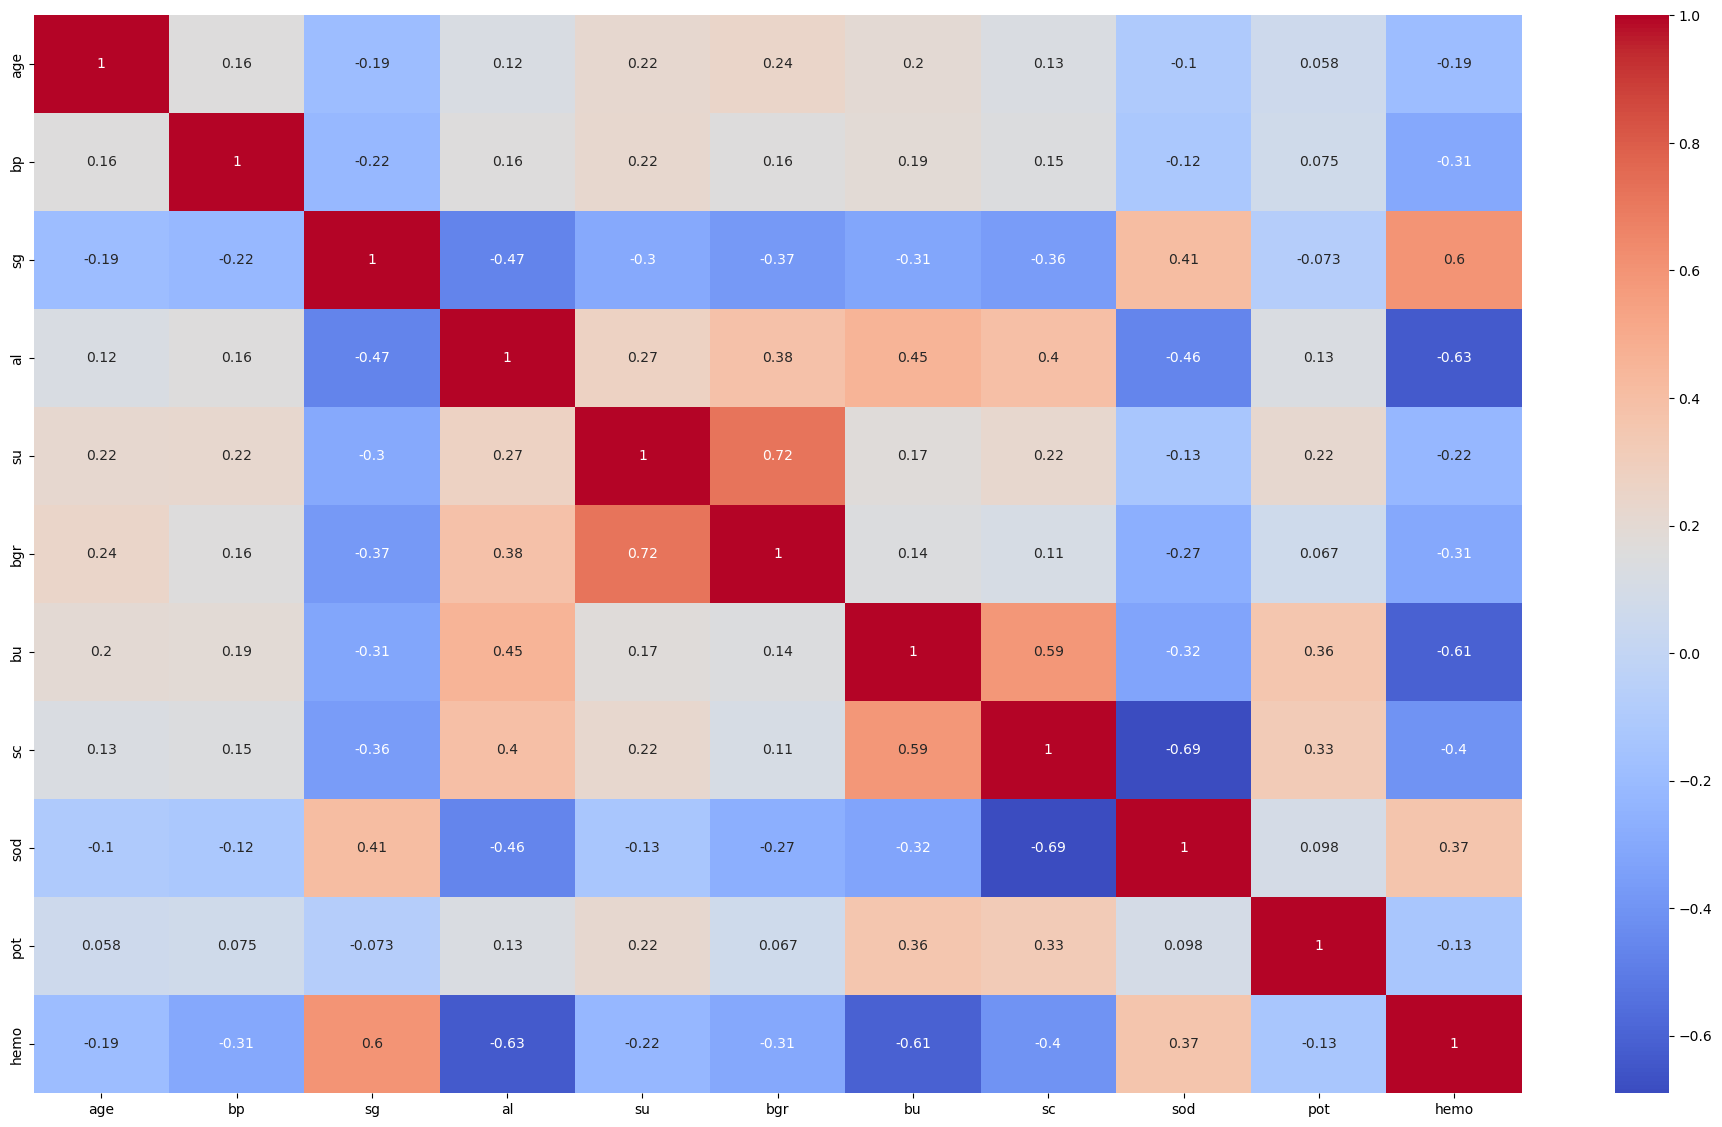

In [3]:
plt.figure(figsize=(24,14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()



In [4]:
x=data.iloc[:,:-1]
x
y=data['classification']
y

id
0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [5]:
class_counts = y.value_counts()
num_classes = len(class_counts)
print("Class Counts:")
print(class_counts)
print("Number of Classes:", num_classes)


Class Counts:
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
Number of Classes: 3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


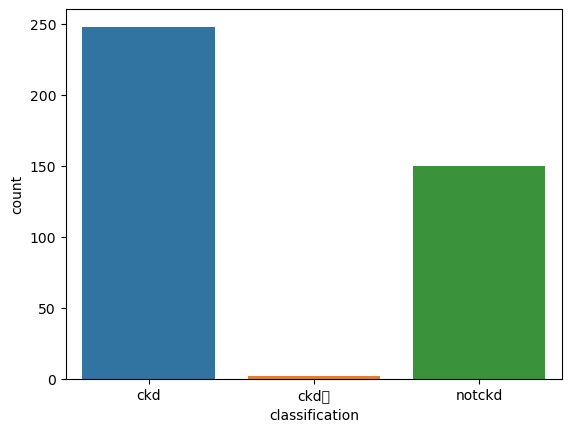

In [6]:
sns.countplot(data['classification'])

In [7]:
# Replace "ckd\t" with "ckd" in the 'classification' column
y = y.replace("ckd\t", "ckd")

# Check the updated class counts and number of classes
class_counts = y.value_counts()
num_classes = len(class_counts)
print("Class Counts:")
print(class_counts)
print("Number of Classes:", num_classes)


Class Counts:
ckd       250
notckd    150
Name: classification, dtype: int64
Number of Classes: 2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

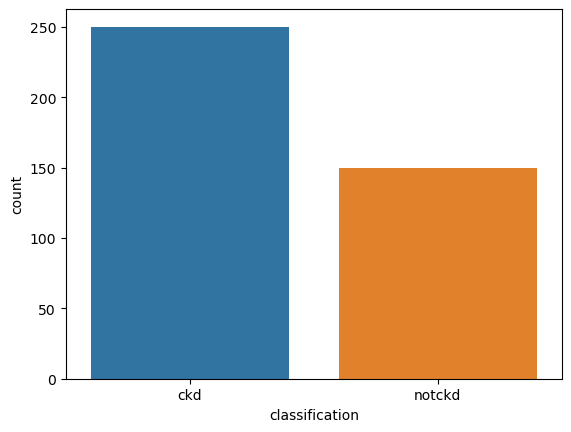

In [8]:
sns.countplot(y)


In [9]:
# one-hot encoding
x=pd.get_dummies(x,drop_first=True)
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,0,0,0,0,1,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0,0,0,1,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0,0,0,1,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0,0,0,1,0,1,0,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [11]:
x=pd.DataFrame.fillna(x,0)
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,0.0,...,0,0,0,0,1,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0,0,0,1,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0,0,0,1,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0,0,0,1,0,1,0,0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
Temp=LabelEncoder()
y=Temp.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
tri=StandardScaler()
x=tri.fit_transform(x)
x

array([[-0.12504259,  0.31077414,  0.37275154, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.3300947 , -1.28977939,  0.37275154, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.62790203,  0.31077414,  0.34223253, ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.0611859 ,  0.31077414,  0.37275154, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-1.79227711, -0.75626154,  0.38801104, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.412775  ,  0.31077414,  0.38801104, ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [14]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# Navie Bayes



In [16]:
from sklearn.naive_bayes import GaussianNB
m1=GaussianNB()
m1.fit(xtr,ytr)
ypr=m1.predict(xte)
ypr

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xnc=accuracy_score(ypr,yte)

acc.append(xnc)
model.append('NB')


In [18]:
print(classification_report(ypr,yte))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        79
           1       0.82      0.88      0.85        41

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.89      0.89       120



In [19]:
confusion_matrix(ypr,yte)

array([[71,  8],
       [ 5, 36]], dtype=int64)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression(max_iter=9)
m2.fit(xtr,ytr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=9)

In [21]:
ypr2=m2.predict(xte)
ypr2
xlr=accuracy_score(ypr2,yte)

acc.append(xlr)
model.append('LR')

In [22]:
print(classification_report(ypr2,yte))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.96      0.98        46

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [23]:
confusion_matrix(ypr2,yte)

array([[74,  0],
       [ 2, 44]], dtype=int64)

# MultiLayer Percepton Classifier

In [24]:
from sklearn.neural_network import MLPClassifier
m3=MLPClassifier(max_iter=100,activation='relu',learning_rate='constant',random_state=51)
m3.fit(xtr,ytr)
ypr3=m3.predict(xte)
ypr3
xmlp=accuracy_score(ypr3,yte)

acc.append(xmlp)
model.append('MLP')
xmlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.975

In [25]:
print(classification_report(ypr3,yte))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        73
           1       1.00      0.94      0.97        47

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [26]:
confusion_matrix(ypr3,yte)

array([[73,  0],
       [ 3, 44]], dtype=int64)

# Ensemble Model

In [27]:
from sklearn.ensemble import VotingClassifier
ensemble_model=VotingClassifier(estimators=[('MLP',m3),
    ('logistic_regression',m2)],voting='soft')

In [28]:
ensemble_model.fit(xtr,ytr)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('MLP',
                              MLPClassifier(max_iter=100, random_state=51)),
                             ('logistic_regression',
                              LogisticRegression(max_iter=9))],
                 voting='soft')

In [29]:
predictions = ensemble_model.predict(xte)


In [30]:
accuracy = accuracy_score(yte, predictions)
print(f'Accuracy of the ensemble model: {accuracy:.2f}')

Accuracy of the ensemble model: 0.98


In [31]:
print(classification_report(predictions,yte))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.96      0.98        46

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [32]:
acc.append(accuracy)
model.append('ensemble_model')


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

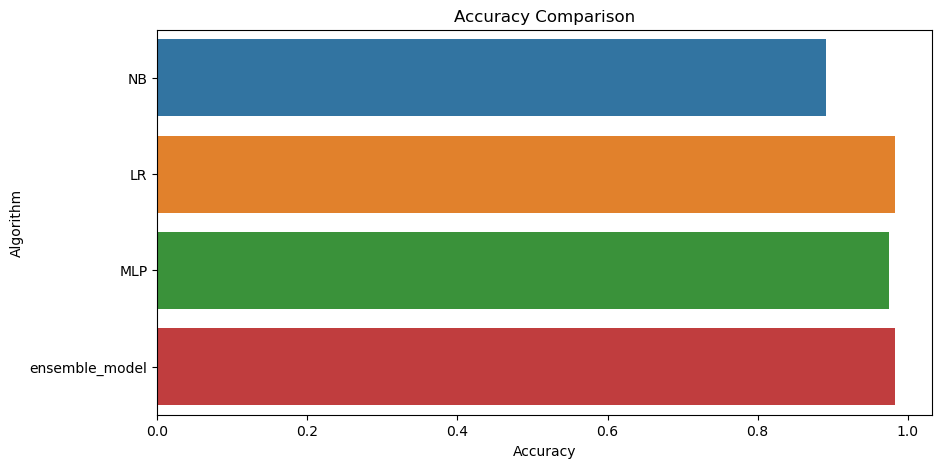

In [33]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model)

In [34]:
acc.append(accuracy)
model.append('EM')
print('Accuracy:', accuracy)

Accuracy: 0.9833333333333333


# Artificial Neural Network

In [68]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [69]:
model = keras.Sequential()
model.add(layers.Input(shape=(xtr.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [71]:
model.fit(xtr,ytr, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
7/7 - 5s - loss: 0.7175 - accuracy: 0.5625 - val_loss: 0.7346 - val_accuracy: 0.5714 - 5s/epoch - 736ms/step
Epoch 2/50
7/7 - 0s - loss: 0.5235 - accuracy: 0.8125 - val_loss: 0.6470 - val_accuracy: 0.6250 - 196ms/epoch - 28ms/step
Epoch 3/50
7/7 - 0s - loss: 0.4058 - accuracy: 0.9286 - val_loss: 0.5808 - val_accuracy: 0.6607 - 136ms/epoch - 19ms/step
Epoch 4/50
7/7 - 0s - loss: 0.3133 - accuracy: 0.9643 - val_loss: 0.5168 - val_accuracy: 0.7500 - 119ms/epoch - 17ms/step
Epoch 5/50
7/7 - 0s - loss: 0.2345 - accuracy: 0.9821 - val_loss: 0.4637 - val_accuracy: 0.8214 - 134ms/epoch - 19ms/step
Epoch 6/50
7/7 - 0s - loss: 0.1726 - accuracy: 0.9821 - val_loss: 0.4198 - val_accuracy: 0.8571 - 133ms/epoch - 19ms/step
Epoch 7/50
7/7 - 0s - loss: 0.1256 - accuracy: 0.9911 - val_loss: 0.3885 - val_accuracy: 0.8571 - 116ms/epoch - 17ms/step
Epoch 8/50
7/7 - 0s - loss: 0.0911 - accuracy: 0.9955 - val_loss: 0.3662 - val_accuracy: 0.8571 - 134ms/epoch - 19ms/step
Epoch 9/50
7/7 - 0s - loss

In [72]:
loss, accuracy = model.evaluate(xte,yte)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

4/4 [==============================] - 0s 12ms/step - loss: 0.1451 - accuracy: 0.9167
Test loss: 0.1451
Test accuracy: 0.9167


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                13120     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15233 (59.50 KB)
Trainable params: 15233 (59.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  # You can also use other cross-validation strategies

In [34]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation and compute cross-validation scores
cross_val_score2 = cross_val_score(m2, x, y, cv=cv, scoring='accuracy')  # Replace 'accuracy' with your desired metric
cross_val_score3 = cross_val_score(m3, x, y, cv=cv, scoring='accuracy')
cross_val_score4= cross_val_score(m4,x,y,cv=cv,scoring='accuracy')
cross_val_score5= cross_val_score(m5,x,y,cv=cv,scoring='accuracy')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [35]:
print(np.mean(cross_val_score2))
print(np.mean(cross_val_score3))
print(np.mean(cross_val_score4))
print(np.mean(cross_val_score5))

0.9824999999999999
0.9550000000000001
0.9675
0.9949999999999999
